# Fresh Grad Job Ads in Penang



Author: Subi

Date: 4/26


Purpose: To Find the Latest Situation of Job Market for Fresh Grad in Penang


Methodology: Selenium, BeautifulSoup, Pandas, Matplotlib


Findings: Most job category are from Sales-Financial Services while most industry are from Banking/Finance, Most company are willing to offer 2.5k as a minimum starting salary and 5k as max starting salary


Recommendation/Conclusion: can get lots of data if we include other state or expand the sample, can check relationship between each variable such as the relationship between industry and job category. Can include more variable if can get company size to cross check with the salary they willing to offer. 

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time 
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

page_url = []
max_page = 7
for i in range(1,max_page + 1):
    page_num = str(i)
    url = 'https://www.jobstreet.com.my/en/job-search/campus/job-vacancy.php?area=1&option=1&location=50700&job-type=1%7C2%7C4%7C8%7C32&job-source=1%2C64&classified=0&job-posted=0&src=45&pg=' + page_num + '&sort=1&order=0&srcr=12&vtype=list'
    page_url.append(url)
    

browser = webdriver.Chrome('./bin/chromedriver')
browser.get('https://myjobstreet.jobstreet.com.my/home/login.php?site=my&language_code=3&go=JOB-ADS&nrfr=1')
   
user = browser.find_element_by_id('login_id')
user.send_keys('#################') #enter ur email

#same for pw
pw = browser.find_element_by_id('password')
pw.send_keys('################') #enter ur pasword

#send user name &keys
pw.send_keys(Keys.RETURN)





In [94]:
#define get fn

def getAndParseURL(url):
    browser.get(url)
    code = browser.page_source
    soup = BeautifulSoup(code,'html.parser')
    return(soup)

In [95]:
#Define scrape function for each intended column

def job(url):
    soup = getAndParseURL(url)
    soup_list = soup.findAll(class_ = 'rRow')
    return(soup_list.find(class_='rRowTitle').get_text() for soup_list in soup_list)


def company(url):
    soup = getAndParseURL(url)
    soup_list = soup.findAll(class_ = 'rRow')
    return(soup_list.find('h3').get_text() for soup_list in soup_list)

def category(url):
    soup = getAndParseURL(url)
    soup_list = soup.findAll(class_ = 'rRow')
    return(soup_list.find(class_='smalldesc').get_text() for soup_list in soup_list)


def industry(url):
    soup = getAndParseURL(url)
    soup_list = soup.findAll(class_ = 'rRow')
    Company1 = [soup_list.find(class_='colComp') for soup_list in soup_list]
    return(Company1[items].find("div", attrs={"class":"smalldesc"}).text.replace('Industry:','') for items in range(len(Company1)))


def salary(url):
    soup = getAndParseURL(url)
    soup_list = soup.findAll(class_ = 'rRow')
    return(soup_list.find(class_='colSal').get_text().replace('\n','').replace('MYR','').replace(',','') for soup_list in soup_list)

def getJoburl(url):
    soup = getAndParseURL(url)
    Job_URL = [x.div.a.get('href') for x in soup.findAll("td", class_ = "colTitle")]
    return Job_URL

In [96]:
JobURLs = []
for page in page_url:
    time.sleep(5)
    JobURLs.extend(getJoburl(page))
    
    
# JobURLs[:5]

In [97]:
#get job details in each click

Experience = []
Job_Desc = []
Company_Size = []
Location = []
Working_Hr = []
Dress_code = []
Benefit = []
Language = []
Average_Proces_Time = []
for url in JobURLs:
    soup = getAndParseURL(url)
    time.sleep(5)
    Experience.append(browser.find_element_by_id("experience").text)
    Job_Desc.append(browser.find_element_by_id("job_description").text)
    Location.append(browser.find_element_by_id("location").text)
    if len(browser.find_elements_by_id('company_size')) > 0:
        Company_Size.append(browser.find_element_by_id("company_size").text)
    else:
        Company_Size.append('Nan')

    if len(browser.find_elements_by_id('work_environment_working_hours')) > 0:
        Working_Hr.append(browser.find_element_by_id("work_environment_working_hours").text)
    else:
        Working_Hr.append('Nan')
    if len(browser.find_elements_by_id('work_environment_dress_code')) > 0:
        Dress_code.append(browser.find_element_by_id("work_environment_dress_code").text)
    else:
        Dress_code.append('Nan')
    if len(browser.find_elements_by_id('work_environment_benefits')) > 0:
        Benefit.append(browser.find_element_by_id("work_environment_benefits").text)
    else:
        Benefit.append('Nan')
    if len(browser.find_elements_by_id('work_environment_spoken_language')) > 0:
        Language.append(browser.find_element_by_id("work_environment_spoken_language").text)
    else:
        Language.append('Nan')
    if len(browser.find_elements_by_id('fast_average_processing_time')) > 0:
        Average_Proces_Time.append(browser.find_element_by_id("fast_average_processing_time").text)
    else:
        Average_Proces_Time.append('Nan')

In [98]:
#scrape each column and put it into list

Job_title = []
Company = []
Category = []
Industry = []
Salary = []
for url in page_url:
    time.sleep(5)
    Job_title.extend(job(url))
    Company.extend(company(url))
    Category.extend(category(url))
    Industry.extend(industry(url))
    Salary.extend(salary(url))
    
browser.close() 

In [119]:
#Put everything into Pandas df

Jobstreet = pd.DataFrame({
    'Job_Title':Job_title,
    'Company':Company,
    'Job_Category':Category,
    'Industry': Industry,
    'Salary':Salary,
    'Experience':Experience,
    'Job_Desc':Job_Desc,
    'Company_Size':Company_Size,
    'Location':Location,
    'Working_Hr':Working_Hr,
    'Dress_code':Dress_code,
    'Benefit':Benefit,
    'Language':Language,
    'Average_Proces_Time':Average_Proces_Time,
    
})

In [120]:
df = Jobstreet

In [121]:
#clean and prep the data

df['Min_Salary'], df['Max_Salary'] = df['Salary'].str.split('-', 1).str #since we have range, split column salary by '-' to min max
df = df.drop(['Salary'], 1) #drop Salary

In [122]:
df = df.replace(r'^\s*$', np.nan, regex=True) # replace blank space with nan
df = df.replace(r'Below Expected Salary', np.nan, regex=True) 
df = df.replace(r'Around Expected Salary', np.nan, regex=True)
df = df.replace(r'Above Expected Salary', np.nan, regex=True)# replace 'Below Expected Salary ' with nan

In [123]:
df['Company_Size'] = df['Company_Size'].map(lambda x: x.strip('Employees').strip('More than').strip('Nan'))

In [124]:
df['Min_Size'], df['Max_Size'] = df['Company_Size'].str.split('-', 1).str

In [125]:
df.Max_Size.fillna(df.Min_Size, inplace=True)

In [126]:
df = df.drop(['Company_Size', 'Min_Size'] , 1)

In [127]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [131]:
df.head()

Job_Title                  Company  \
0    Accounts cum Administrator Clark         Yeahhost Sdn Bhd   
1        IT System Support Technician         Yeahhost Sdn Bhd   
2  营销主管 (实习 或 全职） Marketing Executive  Straits Advisor Sdn Bhd   
3               Remote Wealth Advisor                 JF FINEX   
4                     Assistant Buyer  R&M Electronics Sdn Bhd   

                                        Job_Category  \
0  General/Cost Accounting > Basic Accounting/Boo...   
1       IT - Network/Sys/DB Admin > IT Executive/MIS   
2                             Marketing/Business Dev   
3                         Sales - Financial Services   
4                             Logistics/Supply Chain   

                    Industry                 Experience  \
0              IT / Software                Entry Level   
1              IT / Software                Entry Level   
2          Banking / Finance                Entry Level   
3                  Insurance                Entry Level   
4   Electrical & Electronics  Min 2 years (Entry Level)   

                                            Job_Desc  \
0    Requirements and Responsibilities\nCandidate...   
1    Requirements\nCandidate must possess a Profe...   
2  Job Description\nDigital Marketing 在线营销\nTelem...   
3  Job Description:\n  Work from home\n1. Calling...   
4  Candidate must possess at least Higher Seconda...   

                          Location                        Working_Hr  \
0                Malaysia - Penang             Regular Hours / Shift   
1                Malaysia - Penang             Regular Hours / Shift   
2          Multiple work locations  Regular hours, Mondays - Fridays   
3          Multiple work locations                    Flexible hours   
4  Malaysia - Penang - Bayan Lepas  Regular hours, Mondays - Fridays   

               Dress_code                                            Benefit  \
0  Business (e.g. Shirts)  Miscellaneous allowance, Sports (e.g. Gym), EP...   
1  Business (e.g. Shirts)  Miscellaneous allowance, Sports (e.g. Gym), EP...   
2  Business (e.g. Shirts)                            Miscellaneous allowance   
3  Business (e.g. Shirts)                         Breakfast will be provided   
4  Casual (e.g. T-shirts)                                            Medical   

   Language Average_Proces_Time Min_Salary Max_Salary Max_Size  
0   English   More Than 2 Weeks        NaN        NaN       50  
1   English   More Than 2 Weeks        NaN        NaN       50  
2  Mandarin         4 Days Fast      1500        3000       50  
3  Mandarin          1 Day Fast      3000        5000       50  
4   Mixture             11 Days      1800        2500       50

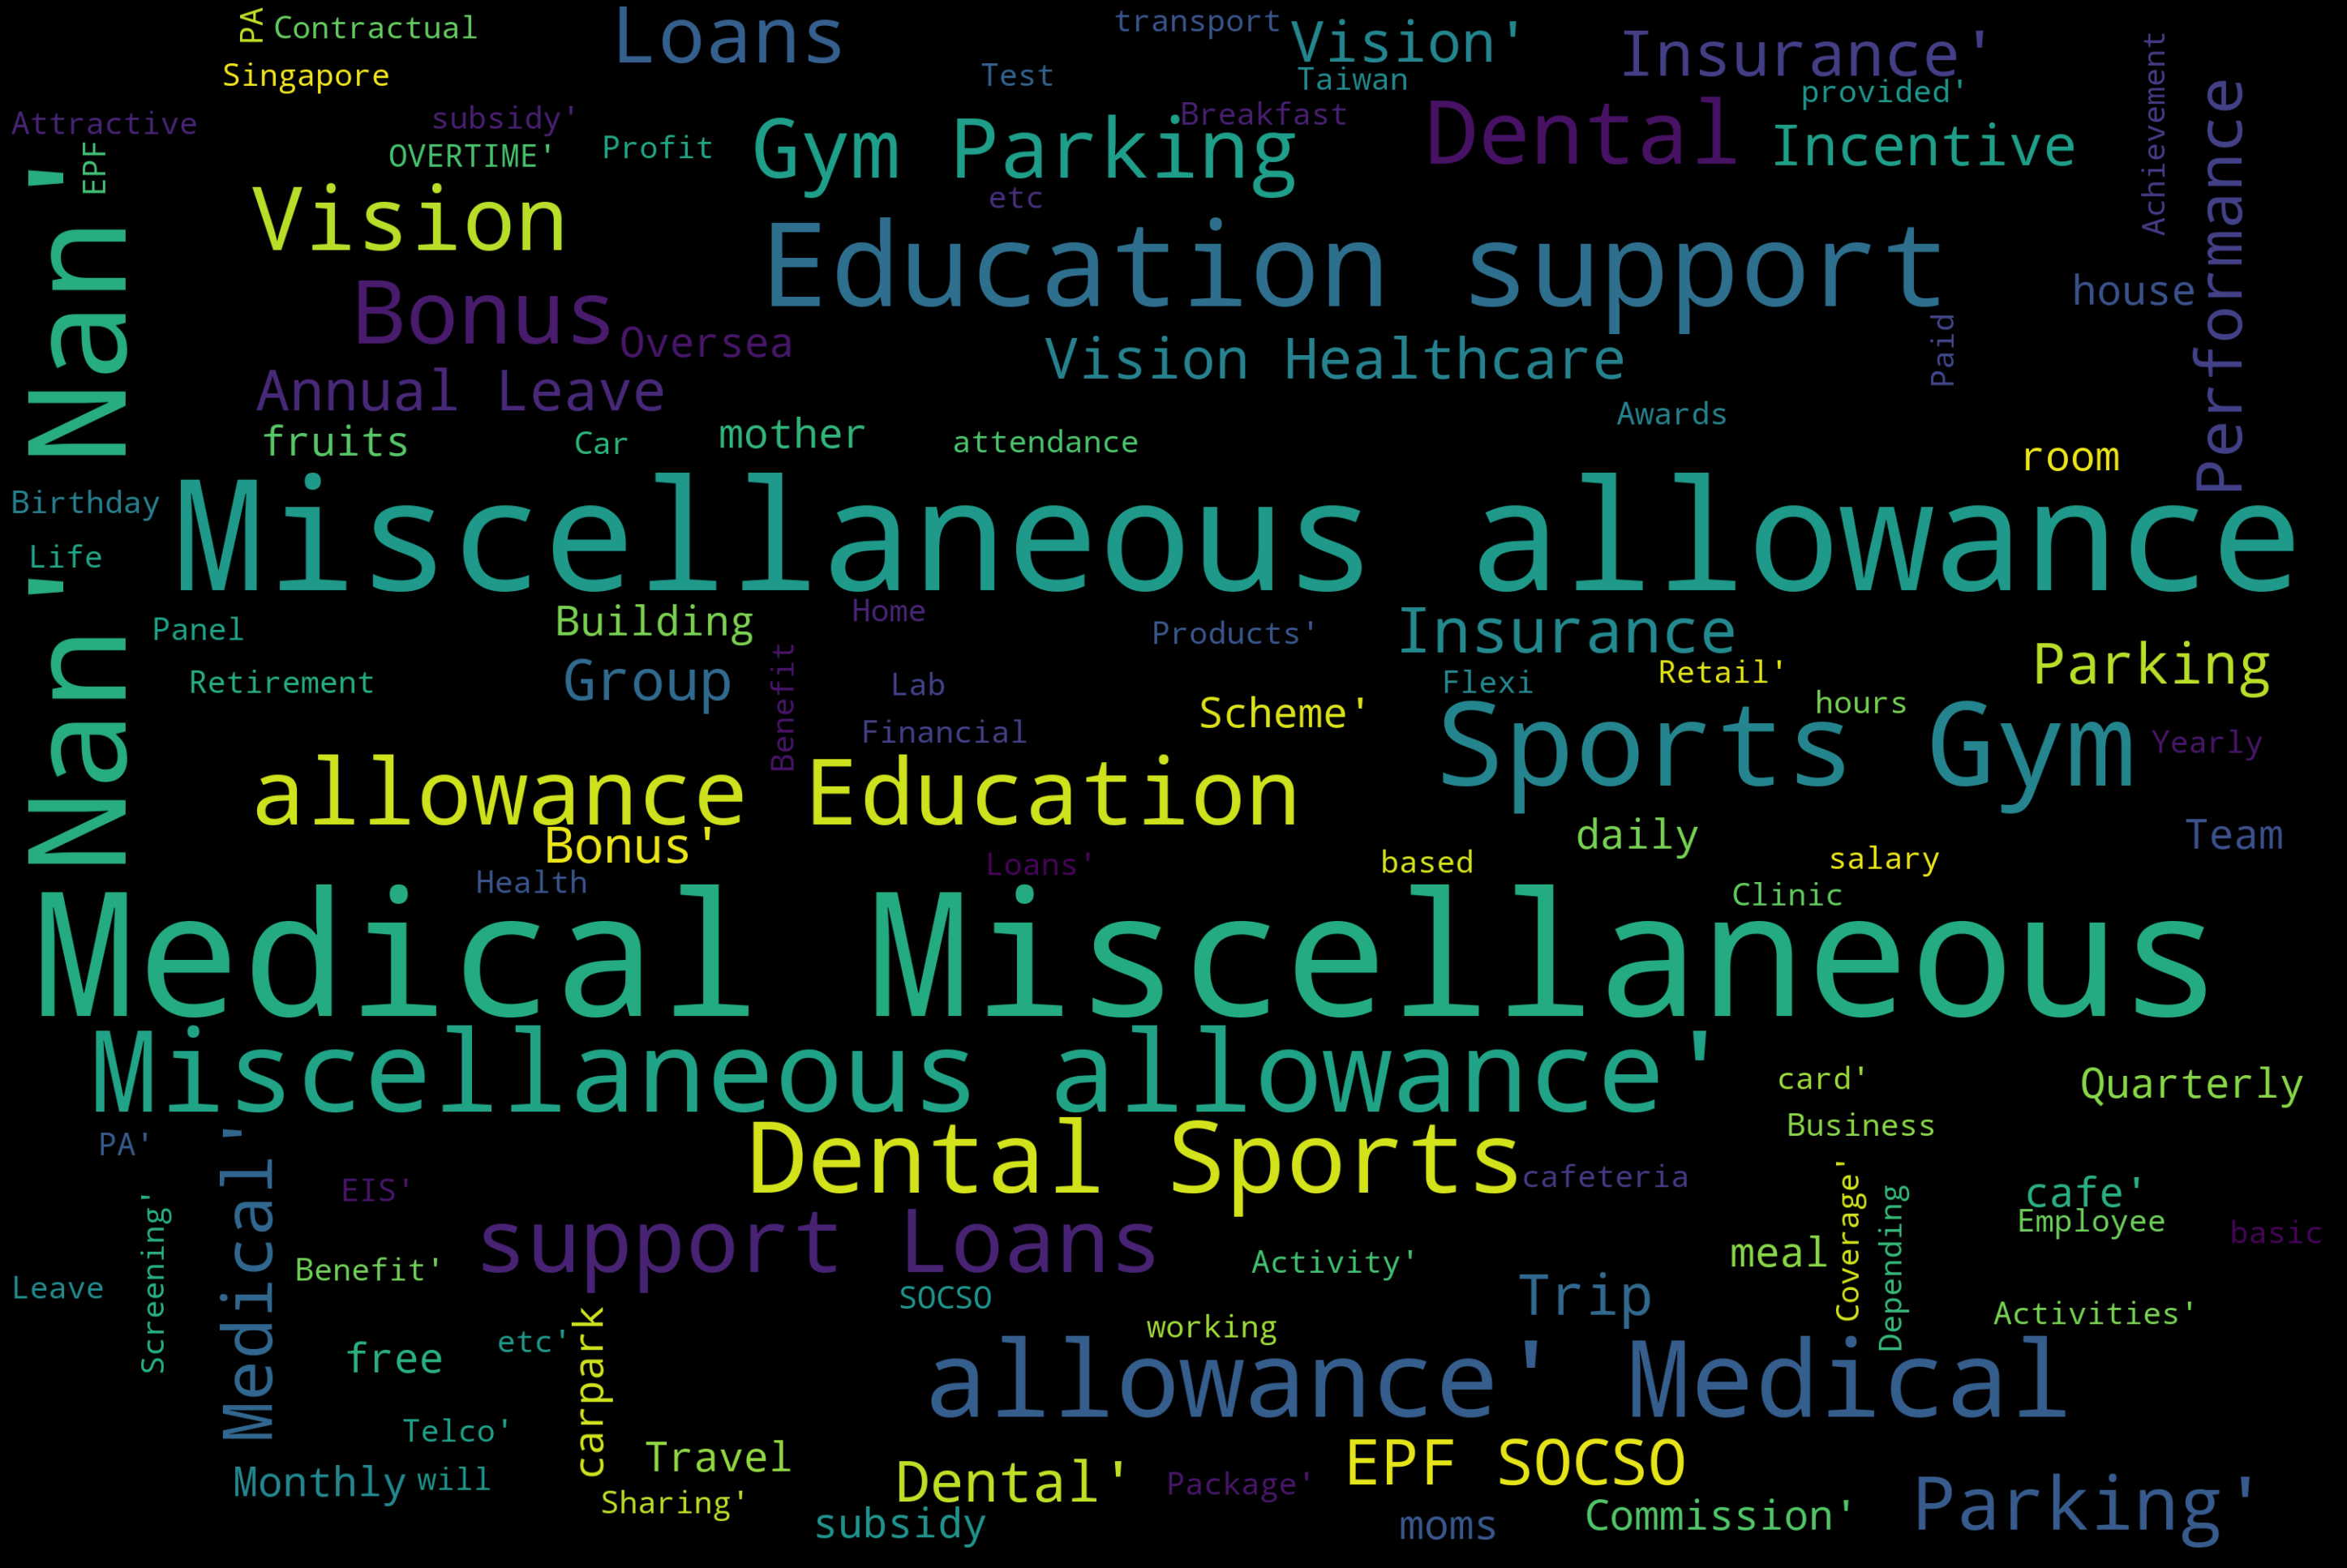

In [136]:
#wordcloud on Benefits

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.Benefit.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:

df.to_csv('Test4.csv')

In [31]:
#Check unique obs of each column

print(df.Job_Title.nunique())
print(df.Company.nunique())
print(df.Job_Category.nunique())
print(df.Industry.nunique())


115
90
46
30


In [32]:
df.describe(include = "all")

Job_Title  \
count                                                 126   
unique                                                115   
top     Personal Banker(Banca)-Top Bank - High Basic H...   
freq                                                    4   

                                              Company  \
count                                             126   
unique                                             90   
top     Agensi Pekerjaan BGC Group (Malaysia) Sdn Bhd   
freq                                                9   

                      Job_Category            Industry   Experience  \
count                          126                 124          126   
unique                          46                  30            4   
top     Sales - Financial Services   Banking / Finance  Entry Level   
freq                            19                  24          109   

                                                 Job_Desc      Company_Size  \
count                                                 126               126   
unique                                                111                 8   
top     Personal Banker- Banca / Wealth \nAssist in cr...  1 - 50 Employees   
freq                                                    4                56   

                       Location                        Working_Hr  \
count                       126                               126   
unique                       28                                20   
top     Multiple work locations  Regular hours, Mondays - Fridays   
freq                         56                                60   

                    Dress_code                  Benefit  \
count                      126                      126   
unique                      14                       28   
top     Business (e.g. Shirts)  Multiple work locations   
freq                        43                       56   

                                Language     Average_Proces_Time Min_Salary  \
count                                126                     126         74   
unique                                20                      14         23   
top     Regular hours, Mondays - Fridays  Business (e.g. Shirts)      2500    
freq                                  60                      43         13   

       Max_Salary  
count          74  
unique         28  
top          5000  
freq            8

In [33]:
#view top ten job category

val = df['Job_Category'].value_counts()[:10]

Count_Category = pd.DataFrame(val).reset_index()
Count_Category.columns = ['Job Category', 'Counts'] 
Count_Category.style.background_gradient(cmap='Greens')

In [34]:
#plot pie chart for Job Category

a = Count_Category['Job Category']
b = Count_Category['Counts']

fig = px.pie(Count_Category, values= b, names=a, color_discrete_sequence=px.colors.sequential.algae[::-1], hole= 0.3,title='Top 10 Job Category')
fig.show()


In [35]:
#view top ten industry

ind = df['Industry'].value_counts()[:11]

Count_Industry = pd.DataFrame(ind).reset_index()
Count_Industry.columns = ['Industry', 'Counts'] 
Count_Industry.style.background_gradient(cmap='Blues')

In [36]:
#Plot top ten industry

c = Count_Industry['Industry']
d = Count_Industry['Counts']

fig = px.pie(Count_Industry, values= d, names=c, color_discrete_sequence=px.colors.sequential.ice, hole= 0.3,title='Top 10 Industry')
fig.show()

In [37]:
# top ten minimum salary offered
min_s = df['Min_Salary'].value_counts()[:11]
Count_Min = pd.DataFrame(min_s).reset_index()
Count_Min.columns = ['Minimum Salary', 'Counts'] 
Count_Min.style.background_gradient(cmap='RdPu')

In [38]:
# top ten maximum Salary offered 

max_s = df['Max_Salary'].value_counts()[:11]
Count_Max = pd.DataFrame(max_s).reset_index()
Count_Max.columns = ['Maximum Salary', 'Counts'] 
Count_Max.style.background_gradient(cmap='GnBu')